In [1]:
import pandas as pd
import re
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

dane = pd.read_csv('bmw_pp.tsv', delimiter='\t')

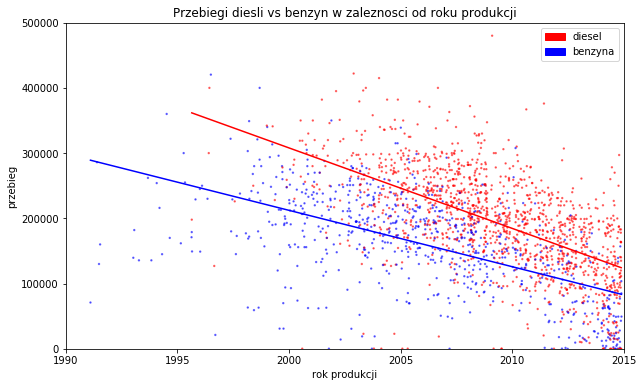

In [3]:
plt.figure(figsize=(10,6))
df = dane.loc[(dane['Rok'] < 2015) & (dane['Rok'] > 1990) & (dane['Paliwo'].isin(['diesel', 'benzyna']))]
colors = np.array(['b' if elem == 'benzyna' else 'r' for elem in df['Paliwo']])
lata = np.array([float(elem) + random.uniform(0.0, 0.9) for elem in df['Rok']])
red_patch = mpatches.Patch(color='red', label='diesel')
blue_patch = mpatches.Patch(color='blue', label='benzyna')
plt.legend(handles=[red_patch, blue_patch])
plt.scatter(lata, df['Przebieg'], s=2, c=colors, alpha=0.5)

b_indices = np.where(colors == 'b')
x_b = lata[b_indices]
y_b = np.array(df['Przebieg'])[b_indices]
z_b = np.polyfit(x_b, y_b, 1)
p_b = np.poly1d(z_b)
x_b_sorted = np.sort(x_b)
plt.plot(x_b_sorted, p_b(x_b_sorted), "b-")

d_indices = np.where(colors == 'r')
x_d = lata[d_indices]
y_d = np.array(df['Przebieg'])[d_indices]
z_d = np.polyfit(x_d, y_d, 1)
p_d = np.poly1d(z_d)
x_d_sorted = np.sort(x_d)
plt.plot(x_d_sorted, p_d(x_d_sorted), "r-")

axes = plt.gca()
axes.set_xlim([1990,2015])
axes.set_ylim([-10, 500000])
plt.title('Przebiegi diesli vs benzyn w zaleznosci od roku produkcji')
plt.ylabel('przebieg')
plt.xlabel('rok produkcji')
plt.savefig("lab1_1.png")

In [28]:
b_indices

(array([], dtype=int64),)

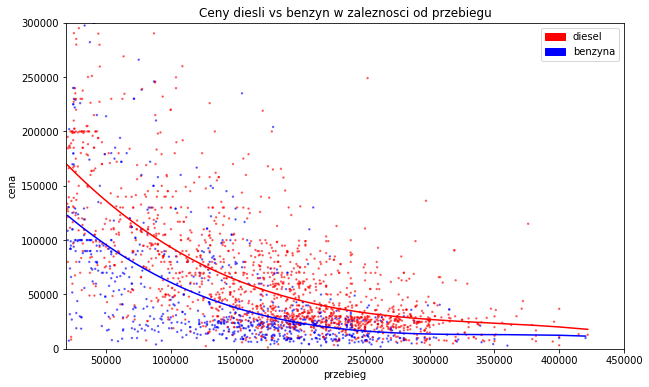

In [5]:
df2 = dane.loc[(dane['Cena'] < 300000) & (dane["Przebieg"] < 450000) & (dane["Przebieg"] > 20000)]
colors = np.array(['b' if elem == 'benzyna' else 'r' for elem in df2['Paliwo']])
plt.figure(figsize=(10,6))
red_patch = mpatches.Patch(color='red', label='diesel')
blue_patch = mpatches.Patch(color='blue', label='benzyna')
plt.legend(handles=[red_patch, blue_patch])
plt.title('Ceny diesli vs benzyn w zaleznosci od przebiegu')
plt.ylabel('cena')
plt.xlabel('przebieg')
plt.scatter(df2["Przebieg"], df2["Cena"], s=2, c=colors, alpha=0.5)


b_indices = np.where(colors == 'b')
x_b = np.array(df2['Przebieg'])[b_indices]
y_b = np.array(df2['Cena'])[b_indices]
z_b = np.polyfit(x_b, y_b, 3)
p_b = np.poly1d(z_b)
x_b_sorted = np.sort(x_b)
plt.plot(x_b_sorted, p_b(x_b_sorted), "b-")

d_indices = np.where(colors == 'r')
x_d = np.array(df2['Przebieg'])[d_indices]
y_d = np.array(df2['Cena'])[d_indices]
z_d = np.polyfit(x_d, y_d, 3)
p_d = np.poly1d(z_d)
x_d_sorted = np.sort(x_d)
plt.plot(x_d_sorted, p_d(x_d_sorted), "r-")

axes = plt.gca()
axes.set_xlim([19000, 450000])
axes.set_ylim([-10, 300000])

plt.savefig("lab1_2.png")